In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./vacancies.csv")
data["date"] = data["date"].str.replace(",квітня", "-april").str.replace(",березня", "-march")
data["date"] = data["date"] + "-2024"
data["date"] = pd.to_datetime(data["date"], format='%d-%B-%Y')



data["salary_num"] = data["salary"].str.replace("$", '').str.replace("до ", '').str.replace("від ", '')
data["salary_num"] = data["salary_num"].str.split("-")
data[['salary_min', 'salary_max']] = data.apply(lambda row: pd.Series(row['salary_num']), axis=1)
data.fillna(0, inplace=True) 
data['salary_min'] = data['salary_min'].astype(int)
data['salary_max'] = data['salary_max'].astype(int)
data["salary_mean"] = data[['salary_min', 'salary_max']].mean(axis=1)
data.head(200)


,company,title,type_of_company,technologies,salary,workplace,location,test_task,date,views,reviews,salary_num,salary_min,salary_max,salary_mean
0,Deep Knowledge Group,OSINT Analyst,Product,0,0,Тільки віддалено,"Україна, None None",0,2024-04-03,57,3,0,0,0,0.0
1,Develux,Business Analyst,Product,0,0,Office або Remote,"Польща, None None",0,2024-04-02,11,2,0,0,0,0.0
2,JSE Global Solutions,Junior Analyst,Product,0,0,Тільки віддалено,"Україна, None None",Є тестове завдання,2024-04-02,372,113,0,0,0,0.0
3,Futurra Group,Data / Product Analyst,Product,"MS Power BI, Microsoft Power BI, Tableau, SQL,...",0,Гібридна робота,"Релокейт, Україна (Київ)",0,2024-04-02,72,11,0,0,0,0.0
4,МАРКЕТИНГ- ПАРТНЕР,Senior Data Analyst,Product,"Data Analisys, Data Analyst, data mining, Prod...",$3000-3500,Тільки офіс,"Релокейт, Україна None",Є тестове завдання,2024-04-02,240,40,"[3000, 3500]",3000,3500,3250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,KaaIoT,Web Analyst,Product,"Marketing Analytics, Analytics, Web Analytics",$600-1000,Тільки віддалено,"Україна, None (Київ)",0,2024-03-26,321,28,"[600, 1000]",600,1000,800.0
89,Trading Space,Senior Product Analyst / Head of Analytics,Product,"Data Analytics, data analysis, Head of Analyti...",0,Тільки віддалено,"Україна, None None",0,2024-03-26,193,34,0,0,0,0.0
90,Evoplay,Business Analyst (Mobile),Product,0,0,Гібридна робота,"Релокейт, Україна (Київ)",Є тестове завдання,2024-03-25,47,6,0,0,0,0.0
91,A-LISTWARE,CVE Analyst,Outstaff,0,0,Тільки віддалено,"Україна, None None",0,2024-03-25,15,0,0,0,0,0.0


In [3]:
salary_max = data['salary_max'].max()
salary_min = data[data['salary_min'] > 0]['salary_min'].min()
salary_mean = (salary_max + salary_min)/2
salary_median = data[data['salary_mean'] > 0]['salary_mean'].median()
print(salary_mean)
print(salary_median)


1975.0
700.0


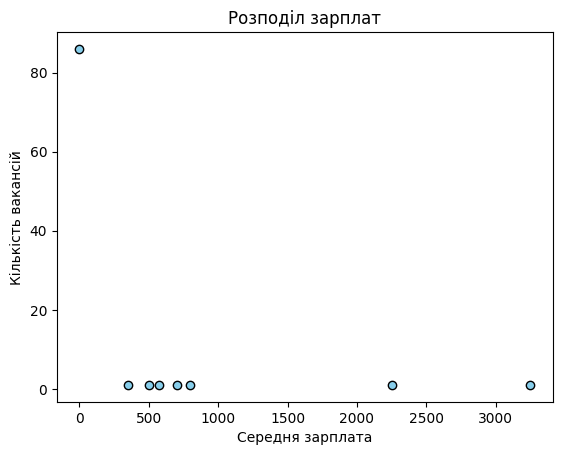

In [4]:
salary_counts = data.groupby('salary_mean').size()
plt.scatter(salary_counts.index, salary_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Середня зарплата')
plt.ylabel('Кількість вакансій')
plt.title('Розподіл зарплат')
plt.show()

In [5]:
total_vacancies = len(data)
specified_salary_vacancies = data[data["salary_mean"] > 0]["salary_mean"].count()
percentage_specified_salary = (specified_salary_vacancies / total_vacancies) * 100
print(total_vacancies, specified_salary_vacancies)
print("{:.2f} %".format(percentage_specified_salary))

93 7
7.53 %


In [6]:
unique_dates_count = data["date"].nunique()
count_new_vacancies_per_day = (total_vacancies / unique_dates_count).__round__(2)
print(count_new_vacancies_per_day)

10.33


In [7]:
cor_salary_reviews = data["salary_mean"].corr(data["reviews"])
cor_salary_views = data["views"].corr(data["salary_mean"])

print(cor_salary_reviews, cor_salary_views)

-0.0002769681778770697 0.04028258046443865


In [8]:
data['salary_is'] = data['salary'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [9]:
data.head()

,company,title,type_of_company,technologies,salary,workplace,location,test_task,date,views,reviews,salary_num,salary_min,salary_max,salary_mean,salary_is
0,Deep Knowledge Group,OSINT Analyst,Product,0,0,Тільки віддалено,"Україна, None None",0,2024-04-03,57,3,0,0,0,0.0,1
1,Develux,Business Analyst,Product,0,0,Office або Remote,"Польща, None None",0,2024-04-02,11,2,0,0,0,0.0,1
2,JSE Global Solutions,Junior Analyst,Product,0,0,Тільки віддалено,"Україна, None None",Є тестове завдання,2024-04-02,372,113,0,0,0,0.0,1
3,Futurra Group,Data / Product Analyst,Product,"MS Power BI, Microsoft Power BI, Tableau, SQL,...",0,Гібридна робота,"Релокейт, Україна (Київ)",0,2024-04-02,72,11,0,0,0,0.0,1
4,МАРКЕТИНГ- ПАРТНЕР,Senior Data Analyst,Product,"Data Analisys, Data Analyst, data mining, Prod...",$3000-3500,Тільки офіс,"Релокейт, Україна None",Є тестове завдання,2024-04-02,240,40,"[3000, 3500]",3000,3500,3250.0,1
